In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/CTMCV1-project/CTMCV1.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/CTMCCVPR20/test/MDBK-run08/img1/001007.jpg  
  inflating: /content/CTMCCVPR20/test/MDBK-run08/img1/001869.jpg  
  inflating: /content/CTMCCVPR20/test/MDBK-run08/img1/000536.jpg  
  inflating: /content/CTMCCVPR20/test/MDBK-run08/img1/001428.jpg  
  inflating: /content/CTMCCVPR20/test/MDBK-run08/img1/000913.jpg  
  inflating: /content/CTMCCVPR20/test/MDBK-run08/img1/000846.jpg  
  inflating: /content/CTMCCVPR20/test/MDBK-run08/img1/000559.jpg  
  inflating: /content/CTMCCVPR20/test/MDBK-run08/img1/000251.jpg  
  inflating: /content/CTMCCVPR20/test/MDBK-run08/img1/000545.jpg  
  inflating: /content/CTMCCVPR20/test/MDBK-run08/img1/001032.jpg  
  inflating: /content/CTMCCVPR20/test/MDBK-run08/img1/001813.jpg  
  inflating: /content/CTMCCVPR20/test/MDBK-run08/img1/000178.jpg  
  inflating: /content/CTMCCVPR20/test/MDBK-run08/img1/001283.jpg  
  inflating: /content/CTMCCVPR20/test/MDBK-run08/img1/001185.jpg  
  inflating

In [5]:
! cp -r /content/drive/MyDrive/DeepSORT-CTMC/ /content/

In [4]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import os 

import tensorflow as tf
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

ModuleNotFoundError: ignored

In [5]:
train_dir = '/content/CTMCCVPR20/train/'
test_dir = '/content/CTMCCVPR20/test/'

In [ ]:
codes = sorted(os.listdir(train_dir))
test_codes = sorted(os.listdir(test_dir))

print("Code", codes)

Code ['3T3-run01', '3T3-run03', '3T3-run05', '3T3-run07', '3T3-run09', 'A-10-run01', 'A-10-run03', 'A-10-run05', 'A-10-run07', 'A-549-run03', 'APM-run01', 'APM-run03', 'APM-run05', 'BPAE-run01', 'BPAE-run03', 'BPAE-run05', 'BPAE-run07', 'CRE-BAG2-run01', 'CRE-BAG2-run03', 'CV-1-run01', 'CV-1-run03', 'LLC-MK2-run01', 'LLC-MK2-run02a', 'LLC-MK2-run03', 'LLC-MK2-run05', 'LLC-MK2-run07', 'MDBK-run01', 'MDBK-run03', 'MDBK-run05', 'MDBK-run07', 'MDBK-run09', 'MDOK-run01', 'MDOK-run03', 'MDOK-run05', 'MDOK-run07', 'MDOK-run09', 'OK-run01', 'OK-run03', 'OK-run05', 'OK-run07', 'PL1Ut-run01', 'PL1Ut-run03', 'PL1Ut-run05', 'RK-13-run01', 'RK-13-run03', 'U2O-S-run03', 'U2O-S-run05']


In [ ]:
subdir_names = set()
for code in os.listdir(train_dir):
  subdir_names |= set(os.listdir(train_dir + code))
print(subdir_names)

{'gt', 'img1', 'TRA', 'seqinfo.ini'}


In [ ]:
def display_frames(code, frames):
  
  files = ["{}{}/img1/{:06}.jpg".format(train_dir, code, i) for i in frames]
  fig=plt.figure(figsize=(12, 12))
  columns = 4
  rows = 4
  assert (len(files) >= columns * rows )

  for i in range(1, columns * rows + 1):
      fig.add_subplot(rows, columns, i)
      plt.imshow(io.imread( files[i] ))

  plt.show()

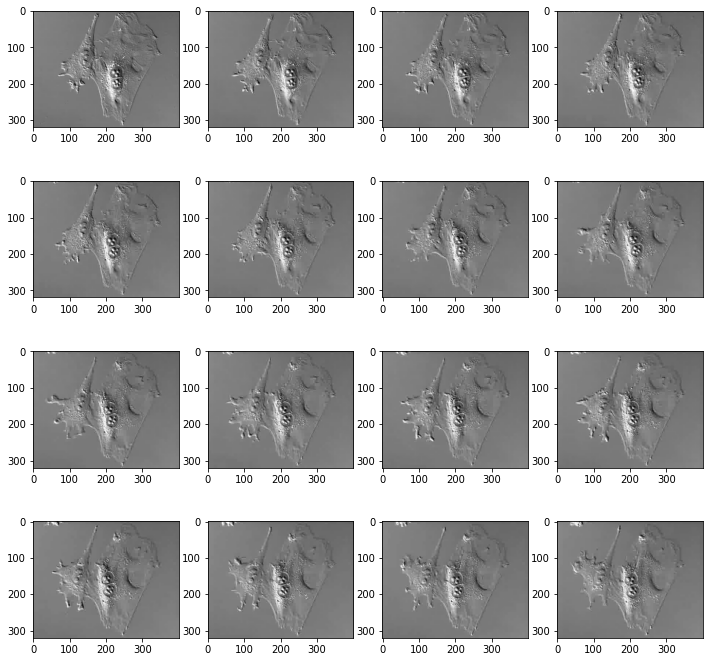

In [ ]:
display_frames('3T3-run01', range(1, 100, 5))

In [ ]:
# How to interpret annotations:
# https://ivc.ischool.utexas.edu/ctmc/
# GT is the bounding boxes (ground truth):
# TRA describes metadata about the cell ids in GT, when they start/end, and what is their parent.
# Download an evaluation script to run and get the MOTA score

1.Download dataset, and get summary data for the dataset: the components of sequences? How many frames?




In [ ]:
def get_test_framerate(code):
  return len(os.listdir("{}{}/img1/".format(test_dir, code)))

In [ ]:
def get_train_framerate(code):
  return len(os.listdir("{}{}/img1/".format(train_dir, code)))

In [ ]:
[(c, get_train_framerate(c)) for c in codes], len(codes)

([('3T3-run01', 1770),
  ('3T3-run03', 2062),
  ('3T3-run05', 2039),
  ('3T3-run07', 1931),
  ('3T3-run09', 2114),
  ('A-10-run01', 1969),
  ('A-10-run03', 1891),
  ('A-10-run05', 1571),
  ('A-10-run07', 2462),
  ('A-549-run03', 1592),
  ('APM-run01', 1794),
  ('APM-run03', 1458),
  ('APM-run05', 2006),
  ('BPAE-run01', 1568),
  ('BPAE-run03', 1803),
  ('BPAE-run05', 1775),
  ('BPAE-run07', 2160),
  ('CRE-BAG2-run01', 1931),
  ('CRE-BAG2-run03', 1652),
  ('CV-1-run01', 1842),
  ('CV-1-run03', 1613),
  ('LLC-MK2-run01', 1866),
  ('LLC-MK2-run02a', 1050),
  ('LLC-MK2-run03', 2040),
  ('LLC-MK2-run05', 1861),
  ('LLC-MK2-run07', 2187),
  ('MDBK-run01', 368),
  ('MDBK-run03', 780),
  ('MDBK-run05', 1500),
  ('MDBK-run07', 1824),
  ('MDBK-run09', 2195),
  ('MDOK-run01', 2100),
  ('MDOK-run03', 763),
  ('MDOK-run05', 1894),
  ('MDOK-run07', 1972),
  ('MDOK-run09', 2073),
  ('OK-run01', 1200),
  ('OK-run03', 1350),
  ('OK-run05', 1350),
  ('OK-run07', 1620),
  ('PL1Ut-run01', 1731),
  ('PL1Ut

In [ ]:
train_frames = [get_train_framerate(c) for c in codes]
test_frames = [get_test_framerate(c) for c in test_codes]

In [ ]:
print(np.array(train_frames).mean())
print(np.array(test_frames).mean())

1710.404255319149
1848.948717948718


In [ ]:
[(c, get_test_framerate(c)) for c in test_codes], len(test_codes)

([('3T3-run02', 2135),
  ('3T3-run04', 2160),
  ('3T3-run06', 1680),
  ('3T3-run08', 1350),
  ('A-10-run02', 2164),
  ('A-10-run04', 1200),
  ('A-10-run06', 1890),
  ('A-549-run02', 2284),
  ('A-549-run04', 1881),
  ('APM-run02', 2069),
  ('APM-run04', 2119),
  ('APM-run06', 2382),
  ('BPAE-run02', 2154),
  ('BPAE-run04', 1905),
  ('BPAE-run06', 2119),
  ('CRE-BAG2-run02', 2543),
  ('CRE-BAG2-run04', 1827),
  ('CV-1-run02', 293),
  ('CV-1-run04', 1050),
  ('LLC-MK2-run02b', 839),
  ('LLC-MK2-run04', 1894),
  ('LLC-MK2-run06', 1716),
  ('MDBK-run02', 583),
  ('MDBK-run04', 2046),
  ('MDBK-run06', 1717),
  ('MDBK-run08', 2012),
  ('MDBK-run10', 2402),
  ('MDOK-run02', 2001),
  ('MDOK-run04', 1618),
  ('MDOK-run06', 2364),
  ('MDOK-run08', 1765),
  ('OK-run02', 2110),
  ('OK-run04', 900),
  ('OK-run06', 1912),
  ('PL1Ut-run02', 1350),
  ('PL1Ut-run04', 2062),
  ('RK-13-run02', 1050),
  ('U2O-S-run02', 4437),
  ('U2O-S-run04', 2126)],
 39)

2.For each video, check the manually labeled output


In [ ]:
import pandas as pd

# See https://motchallenge.net/instructions/
# The file format should be the same as the ground truth file, which is a CSV text-file containing one object instance per line. Each line must contain 10 values:

# <frame>, <id>, <bb_left>, <bb_top>, <bb_width>, <bb_height>, <conf>, <x>, <y>, <z>
# The conf value contains the detection confidence in the det.txt files. 
# For the ground truth, it acts as a flag whether the entry is to be considered. 
# A value of 0 means that this particular instance is ignored in the evaluation, 
# while any other value can be used to mark it as active. 

# For submitted results, all lines in the .txt file are considered. 
# The world coordinates x,y,z are ignored for the 2D challenge and can be filled with -1. 
# Similarly, the bounding boxes are ignored for the 3D challenge. 
# However, each line is still required to contain 10 values.

# All frame numbers, target IDs and bounding boxes are 1-based. 
def get_gt(code):
  return pd.read_csv("{}{}/gt/gt.txt".format(train_dir, code, ), \
                     names=["frame", "id", "bb_left", "bb_top", "bb_width", "bb_height", "conf", "x", "y", "z"])
def get_tra(code):
  return pd.read_csv("{}{}/TRA/man_track.txt".format(train_dir, code, ), \
                     names=["track_id", "begin_track", "end_track", "parent_track"], \
                     delimiter=" ")
  

def get_img(code, frame):
   return io.imread("{}{}/img1/{:06}.jpg".format(train_dir, code, frame))

In [ ]:
gt = get_gt("MDOK-run01")

,frame,id,bb_left,bb_top,bb_width,bb_height,conf,x,y,z
0,1,1,73,11,106,214,1,-1,-1,NaN
920,1,2,160,185,145,130,1,-1,-1,NaN


In [ ]:
gt.groupby('frame').count()

,id,bb_left,bb_top,bb_width,bb_height,conf,x,y,z
frame,,,,,,,,,
1,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1,1,0
4,1,1,1,1,1,1,1,1,0
5,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...
2096,2,2,2,2,2,2,2,2,0
2097,2,2,2,2,2,2,2,2,0
2098,2,2,2,2,2,2,2,2,0


In [ ]:
[(gt.bb_left[i], gt.bb_top[i], gt.bb_width[i], gt.bb_height[i]) for i in range(len(gt))]

In [ ]:
import matplotlib.patches as patches

In [ ]:
def display_frames_bound(code, frames):
  
  files = ["{}{}/img1/{:06}.jpg".format(train_dir, code, i) for i in frames]
  gt = get_gt(code)
  rect_list = [(gt.bb_left[i], gt.bb_top[i], gt.bb_width[i], gt.bb_height[i]) for i in frames]
  #print(rect)
  columns,rows = 4,4
  fig, axes =plt.subplots(columns, rows,figsize=(12, 12))
  assert (len(files) >= columns * rows )
  

  for i,ax in enumerate(axes.ravel()):
      im = io.imread( files[i] )
      x,y,w,h, = rect_list[i]
      print(x,y,w,h)
      # Create a Rectangle patch
      ax.imshow(im)
      print(im.shape)
      rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')

      # Add the patch to the Axes
      ax.add_patch(rect)
      ax.title.set_text("Frame = {}".format(frames[i]))

  fig.suptitle("Frames {}-{} w/ step {} for {}".format(min(frames), frames[i], (frames[i] - min(frames))/i, code), fontsize = 20)
  plt.show()

In [ ]:
# TODO: Draw the bounding boxes and IDs for a few consecutive frames . 

73 11 106 215
(320, 400, 3)
63 12 115 230
(320, 400, 3)
47 13 130 263
(320, 400, 3)
45 13 132 232
(320, 400, 3)
51 29 122 186
(320, 400, 3)
72 8 109 191
(320, 400, 3)
73 0 157 114
(320, 400, 3)
29 0 201 136
(320, 400, 3)
14 4 215 119
(320, 400, 3)
4 27 193 109
(320, 400, 3)
0 22 188 116
(320, 400, 3)
0 0 165 135
(320, 400, 3)
0 0 147 120
(320, 400, 3)
0 0 128 93
(320, 400, 3)
0 0 128 34
(320, 400, 3)
0 0 136 47
(320, 400, 3)


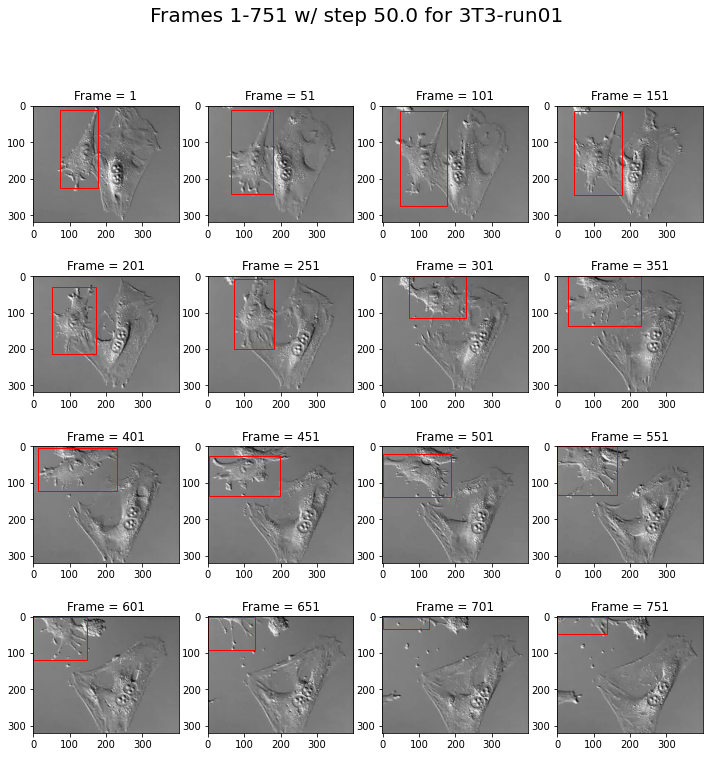

In [ ]:
display_frames_bound('3T3-run01', range(1, 1000, 50))

3.Try fitting a very simple OpenCV optical flow model for tracking the cells


In [ ]:
 np.array(gt[gt.frame == 1])

array([[  1.,   1.,  73.,  11., 106., 214.,   1.,  -1.,  -1.,  nan],
       [  1.,   2., 160., 185., 145., 130.,   1.,  -1.,  -1.,  nan]])

In [ ]:


# Set up tracker.
# Instead of MIL, you can also use

tracker_types = ['BOOSTING', 'MIL','KCF', 'TLD', 'MEDIANFLOW', 'GOTURN', 'MOSSE', 'CSRT']
tracker_type = tracker_types[2]


if tracker_type == 'BOOSTING':
    tracker = cv.TrackerBoosting_create()
if tracker_type == 'MIL':
    tracker = cv.TrackerMIL_create()
if tracker_type == 'KCF':
    tracker = cv.TrackerKCF_create()
if tracker_type == 'TLD':
    tracker = cv.TrackerTLD_create()
if tracker_type == 'MEDIANFLOW':
    tracker = cv.TrackerMedianFlow_create()
if tracker_type == 'GOTURN':
    tracker = cv.TrackerGOTURN_create()
if tracker_type == 'MOSSE':
    tracker = cv.TrackerMOSSE_create()
if tracker_type == "CSRT":
    tracker = cv.TrackerCSRT_create()

# Read video
#video = cv2.VideoCapture("videos/chaplin.mp4")
code = '3T3-run01'
gt = get_gt(code)
n_frames = get_train_framerate(code)

gt_bboxes = [(gt.bb_left[i], gt.bb_top[i], gt.bb_width[i], gt.bb_height[i]) for i in range( n_frames)]


bbox = (gt.bb_left[0], gt.bb_top[0], gt.bb_width[0], gt.bb_height[0])
ok = tracker.init(get_img(code, 1),bbox)
# track cell id 1 at frame 1. 

def draw_gt_boxes(frame, frame_num):
  colors = [(0,0,0), (0,255,0), (0,255,255), (255,255,0), (255, 0, 255), (255,100,100), (100, 100, 255)]
  for row in np.array(gt[gt.frame == frame_num]):
    id = row[1]
    bbox = row[2:6]
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv.rectangle(frame, p1, p2, colors[int(id) % len(colors)], 2, 1)

for i in range(2, 1000 + 1): #n_frames + 1):
  frame = get_img(code, i)
  if not ok:
    break
  timer = cv.getTickCount()
  ok, bbox = tracker.update(frame)
  fps = cv.getTickFrequency() / (cv.getTickCount() - timer);
  if ok:
      # Tracking success
      p1 = (int(bbox[0]), int(bbox[1]))
      p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
      cv.rectangle(frame, p1, p2, (255,0,0), 2, 1)
  else:
        # Tracking failure
      cv.putText(frame, "Tracking failure detected", (100,80), cv.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2)

  # Display FPS on frame
  # cv.putText(frame, "FPS : " + str(int(fps)), (100,50), cv.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50), 2);



  if i % 10 == 0:
    # Display result
    # Draw ground truth bounding box

    # Display tracker type on frame
    cv.putText(frame, tracker_type + " Tracker", (100,20), cv.FONT_HERSHEY_SIMPLEX, 0.75, (255,0,0),2);

    draw_gt_boxes(frame, i)
    print("Tracking for frame {}".format(i))
    cv2_imshow(frame)
    cv2.imwrite("./data/demo/{}.png".format(i), frame)

# # Read first frame.
# ok, frame = video.read()
# if not ok:
#     print 'Cannot read video file'
#     sys.exit()

# # Define an initial bounding box
# bbox = (287, 23, 86, 320)

# # Uncomment the line below to select a different bounding box
# #bbox = cv2.selectROI(frame, False)

# # Initialize tracker with first frame and bounding box
# ok = tracker.init(frame, bbox)

# while True:
#     # Read a new frame
#     ok, frame = video.read()
#     if not ok:
#         break
    
#     # Start timer
#     timer = cv2.getTickCount()

#     # Update tracker
#     ok, bbox = tracker.update(frame)

#     # Calculate Frames per second (FPS)
#     fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer);

#     # Draw bounding box
#     if ok:
#         # Tracking success
#         p1 = (int(bbox[0]), int(bbox[1]))
#         p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
#         cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)
#     else :
#         # Tracking failure
#         cv2.putText(frame, "Tracking failure detected", (100,80), cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2)

#     # Display tracker type on frame
#     cv2.putText(frame, tracker_type + " Tracker", (100,20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50),2);

#     # Display FPS on frame
#     cv2.putText(frame, "FPS : " + str(int(fps)), (100,50), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (50,170,50), 2);

#     # Display result
#     cv2.imshow("Tracking", frame)


In [ ]:
def display_KCF_tracking(code, frames):
  
  files = ["./data/demo/{}.png".format(i) for i in frames]
  #gt = get_gt(code)
  #rect_list = [(gt.bb_left[i], gt.bb_top[i], gt.bb_width[i], gt.bb_height[i]) for i in frames]
  #print(rect)
  columns,rows = 4,4
  fig, axes =plt.subplots(columns, rows,figsize=(12, 12))
  #assert (len(files) >= columns * rows )
  

  for i,ax in enumerate(axes.ravel()):
      im = io.imread( files[i] )
      # Create a Rectangle patch
      ax.imshow(im)
      ax.title.set_text("Frame = {}".format(frames[i]))

  fig.suptitle("KCF Tracking for {}".format(code), fontsize = 20)
  plt.show()

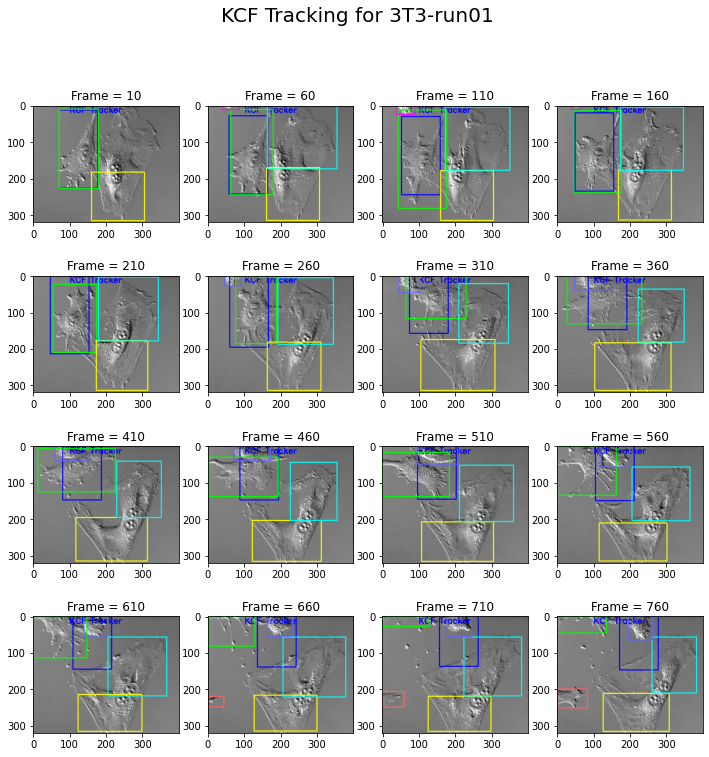

In [ ]:
display_KCF_tracking('3T3-run01', range(10, 2000, 50))

In [ ]:
import cv2
import os
code = "3T3-run01"
image_folder = '{}{}/img1/'.format(train_dir, code)
#print(image_folder)
video_name = './data/{}.mp4'.format(code)

images = [img for img in os.listdir(image_folder)]
print(images)
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))
v = cv2.VideoCapture(video_name)
cv2.destroyAllWindows()
video.release()


['001064.jpg', '000643.jpg', '000682.jpg', '000121.jpg', '000763.jpg', '000683.jpg', '000359.jpg', '001311.jpg', '000150.jpg', '000862.jpg', '000344.jpg', '001126.jpg', '001510.jpg', '000216.jpg', '000720.jpg', '000660.jpg', '000280.jpg', '000717.jpg', '000891.jpg', '000028.jpg', '001317.jpg', '000005.jpg', '001651.jpg', '000899.jpg', '000932.jpg', '001475.jpg', '000571.jpg', '000695.jpg', '000754.jpg', '000849.jpg', '000827.jpg', '000487.jpg', '000133.jpg', '001586.jpg', '000206.jpg', '001199.jpg', '000322.jpg', '000249.jpg', '000406.jpg', '001750.jpg', '001376.jpg', '000287.jpg', '000856.jpg', '000015.jpg', '001550.jpg', '000749.jpg', '000308.jpg', '001671.jpg', '001676.jpg', '001423.jpg', '001181.jpg', '001516.jpg', '000580.jpg', '001519.jpg', '001114.jpg', '001212.jpg', '001287.jpg', '001524.jpg', '001328.jpg', '000369.jpg', '000516.jpg', '000104.jpg', '001176.jpg', '001394.jpg', '000756.jpg', '001289.jpg', '001090.jpg', '001264.jpg', '000689.jpg', '000390.jpg', '001094.jpg', '0009

### Implementation of DeepSORT

In [6]:
!git clone https://github.com/nwojke/deep_sort.git

Cloning into 'deep_sort'...
remote: Enumerating objects: 141, done.
remote: Total 141 (delta 0), reused 0 (delta 0), pack-reused 141
Receiving objects: 100% (141/141), 67.08 KiB | 903.00 KiB/s, done.
Resolving deltas: 100% (78/78), done.


In [22]:
os.chdir('/content/deep_sort/')
pwd()


In [21]:
# !cd /content/deep_sort/
# !pwd
!cp -r /content/drive/MyDrive/resources/ ./

/content


In [7]:
#from deep_sort import *
!pip install tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 35kB/s 
     |████████████████████████████████| 3.8MB 23.4MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 512kB 41.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=8919c372f6633a303c7261c6a76d828633ac729beb9ea37e2af180c96980d2ad
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tens

In [8]:
import tensorflow as tf

In [ ]:
# Generate detections from standard MOT challenge detections
! python tools/generate_detections.py \
    --model=resources/networks/mars-small128.pb \
    --mot_dir=../CTMCCVPR20/train \
    --output_dir=./resources/detections/CTMCCVPR20

In [30]:
# Make a copy of the detections in Google Drive
!cp -r ./resources /content/drive/MyDrive/resource

In [110]:
# Run Tracker on one sequence
! python deep_sort_app.py \
    --sequence_dir=/content/CTMCCVPR20/train/3T3-run01 \
    --detection_file=/content/deep_sort/resources/detections/CTMCCVPR20/3T3-run01.npy \
    --min_confidence=0.3 \
    --nn_budget=100 \
    --display=False \
    --output_file=./resources/predictions/train/3T3-run01.txt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [ ]:
/content/CTMCCVPR20/train/U2O-S-run03

In [114]:
! python deep_sort_app.py \
    --sequence_dir=/content/CTMCCVPR20/train/U2O-S-run05 \
    --detection_file=/content/deep_sort/resources/detections/CTMCCVPR20/U2O-S-run05.npy \
    --min_confidence=0.3 \
    --nn_budget=100 \
    --display=False \
    --output_file=./resources/predictions/train/U2O-S-run05.txt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
processing /content/CTMCCVPR20/train/U2O-S-run05
/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
Processing frame 00100
Processing frame 00200
Processing frame 00300
Processing frame 00400
Processing frame 00500
Processing frame 00600
Processing frame 00700
Processing frame 00800
Processing frame 00900
Processing frame 01000
Processing frame 01100
Processing frame 01200
Processing frame 01300
Processing frame 01400
Processing frame 01500
Processing frame 01600
Processing frame 01700
Processing frame 01800
Processing frame 01900


In [112]:
# Run Tracker on one sequence
%%shell
for filename in /content/CTMCCVPR20/train/*; do \
  seq=$(basename $filename); \
  echo "running tracker on $seq"; \
  python deep_sort_app.py \
    --sequence_dir=/content/CTMCCVPR20/train/"$seq" \
    --detection_file=/content/deep_sort/resources/detections/CTMCCVPR20/"$seq".npy \
    --min_confidence=0.3 \
    --nn_budget=100 \
    --display=False \
    --output_file=./resources/predictions/train/"$seq".txt; 
done;


Traceback (most recent call last):
  File "deep_sort_app.py", line 264, in <module>
    args.max_cosine_distance, args.nn_budget, args.display)
  File "deep_sort_app.py", line 207, in run
    visualizer.run(frame_callback)
  File "/content/deep_sort/application_util/visualization.py", line 80, in run
    frame_callback(self, self.frame_idx)
  File "deep_sort_app.py", line 184, in frame_callback
    tracker.update(detections)
  File "/content/deep_sort/deep_sort/tracker.py", line 69, in update
    self._match(detections)
  File "/content/deep_sort/deep_sort/tracker.py", line 127, in _match
    detections, iou_track_candidates, unmatched_detections)
  File "/content/deep_sort/deep_sort/linear_assignment.py", line 58, in min_cost_matching
    indices = linear_assignment(cost_matrix)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py", line 59, in linear_assignment
    indices = _hungarian(X).tolist()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ut

CalledProcessError: ignored

In [115]:
! cp -r ./resources/predictions /content/drive/MyDrive/resources-CTMC/

In [14]:
os.chdir('/content/DeepSORT-CTMC')
os.listdir()

['__pycache__',
 'evaluate_motchallenge.py',
 'deep_sort',
 'deep_sort_app.py',
 'tools',
 'generate_videos.py',
 '.gitignore',
 'application_util',
 'resources',
 'README.md',
 'show_results.py',
 'LICENSE',
 '.git']

In [15]:

! python generate_videos.py \
--mot_dir=../CTMCCVPR20/train \
--result_dir=./resources/predictions/train \
--output_dir=./output \

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
Saving MDOK-run07.txt to ./output/MDOK-run07.avi.
Frame idx 1
: cannot connect to X server 


In [16]:
! python evaluate_motchallenge.py \
--mot_dir=../CTMCCVPR20/train \
--detection_dir=./resources/detections/CTMCCVPR20 \
--output_dir=./evaluations \

In [17]:
!pip install motmetrics


     |████████████████████████████████| 153kB 7.7MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 81kB 4.9MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 102kB 6.5MB/s 
     |████████████████████████████████| 71kB 6.4MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-7.0.0-cp37-none-any.whl size=20070 sha256=990e207b0693be2ac775714e276660d127af0f14cae139951417a24cf6a91319
  Stored in directory: /root/.cache/pip/wheels/f1/93/7b/127daf0c3a5a49feb2fecd468d508067c733fba5192f726ad1
Successfully built py-cpuinfo
ERROR: pytest-benchmark 3.2.3 has requirement pytest>=3.8, but you'll have pytest 3.6.4 which is incompatible.
